ЛР3 "Обработка признаков. Часть 2"

Ваганов Даниил ИУ5-24М

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

def diagnostic_plots(df, variable):
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.show()

##Загрузка датасета

In [12]:
data=pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Описание датасета**

Formatted Data: дата

Summary: резюмированная погода

Precip Type: тип осадков

Temperature (C): температура

Apparent Temperature (C): ощущаемая температура

Humidity: влажность

Wind Speed (km/h): скорость ветра

Wind Bearing (degrees): направление ветра

Visibility (km): видимость

Loud Cover: облачность

Pressure (millibars): атмосферное давление

Daily Summary: резюмированная погода за день

In [15]:
data.shape

(96453, 12)

In [16]:
data.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [17]:
X_ALL = data.drop(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary','Loud Cover'], axis=1)
# Функция для восстановления датафрейма на основе масштабированных данных
def arr_to_df(arr_scaled):
  res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
  return res
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Apparent Temperature (C)'],test_size=0.2,
random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)
X_train_df.shape, X_test_df.shape

((77162, 7), (19291, 7))

##Масштабирование

###Standart scaler

In [18]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled = arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.101685
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.105960
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.108610
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.112628
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.113483
...,...,...,...,...,...,...,...
96448,1.474532,1.417400,-1.559811,0.026855,-1.457488,1.372265,0.095102
96449,1.324468,1.283404,-1.304020,-0.103556,-1.559925,1.241686,0.101942
96450,1.058076,1.045534,-0.894753,-0.264241,-1.466800,1.372265,0.106216
96451,1.003983,0.997233,-0.690120,-0.040680,-1.559925,1.372265,0.108696


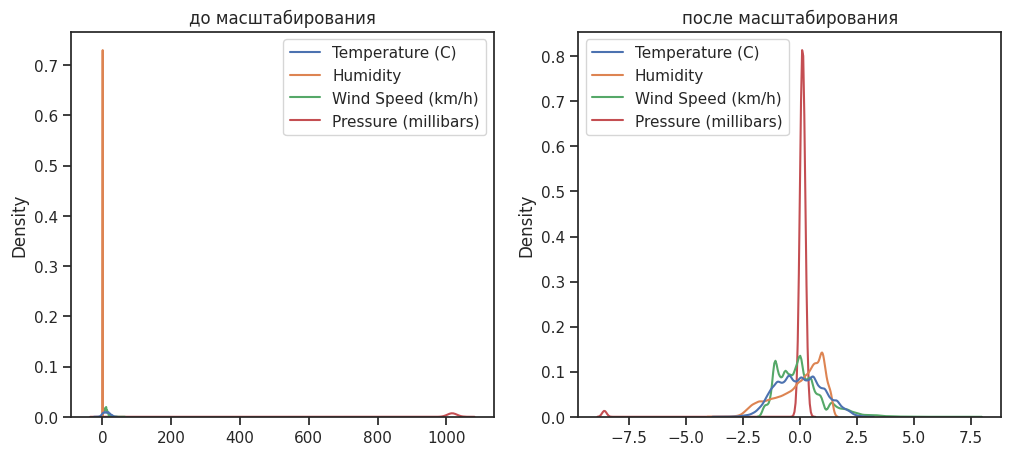

In [19]:
def draw_kde(col_list, df1, df2, label1, label2):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5)) # первый график
  ax1.set_title(label1)
  sns.kdeplot(data=df1[col_list], ax=ax1) # второй график
  ax2.set_title(label2)
  sns.kdeplot(data=df2[col_list], ax=ax2)
  plt.show()
draw_kde(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

###MeanTransform

In [20]:
class MeanNormalisation:
    def fit(self, param_df):
      self.means = X_train.mean(axis=0)
      maxs = X_train.max(axis=0)
      mins = X_train.min(axis=0)
      self.ranges = maxs - mins
    def transform(self, param_df):
      param_df_scaled = (param_df - self.means) / self.ranges
      return param_df_scaled
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,9.645300e+04,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,-0.000016,3.616382e-07,-0.000143,-0.000398,0.000252,-0.000138,-0.000104
std,0.154737,1.595089e-01,0.195473,0.123608,0.299118,0.260380,0.111785
min,-0.546851,-5.751720e-01,-0.735042,-0.193682,-0.522058,-0.642829,-0.958872
25%,-0.117367,-1.274046e-01,-0.135042,-0.089480,-0.198938,-0.124829,0.008176
50%,0.001074,1.707391e-02,0.044958,-0.015502,-0.020665,-0.018829,0.012524
75%,0.111866,1.190539e-01,0.154958,0.059052,0.285742,0.277171,0.016959
max,0.453149,4.248280e-01,0.264958,0.947941,0.477942,0.357171,0.041128


In [21]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
data_cs22_scaled_train.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,7.716200e+04,7.716200e+04,7.716200e+04,7.716200e+04,7.716200e+04,7.716200e+04,7.716200e+04
mean,2.441391e-17,-1.853201e-18,1.253501e-16,2.414917e-17,3.006560e-17,-1.604113e-16,5.836433e-17
std,1.546322e-01,1.594559e-01,1.954000e-01,1.237208e-01,2.992257e-01,2.607270e-01,1.112816e-01
min,-5.468511e-01,-5.751720e-01,-7.350417e-01,-1.936823e-01,-5.220576e-01,-6.428290e-01,-9.588722e-01
25%,-1.170068e-01,-1.273217e-01,-1.350417e-01,-8.890397e-02,-1.989379e-01,-1.248290e-01,8.166548e-03
50%,1.344410e-03,1.732244e-02,4.495827e-02,-1.435014e-02,-2.066488e-02,-1.882896e-02,1.250532e-02
75%,1.118655e-01,1.190539e-01,1.549583e-01,5.905227e-02,2.857418e-01,2.791710e-01,1.694921e-02
max,4.531489e-01,4.248280e-01,2.649583e-01,8.063177e-01,4.779424e-01,3.571710e-01,4.112780e-02


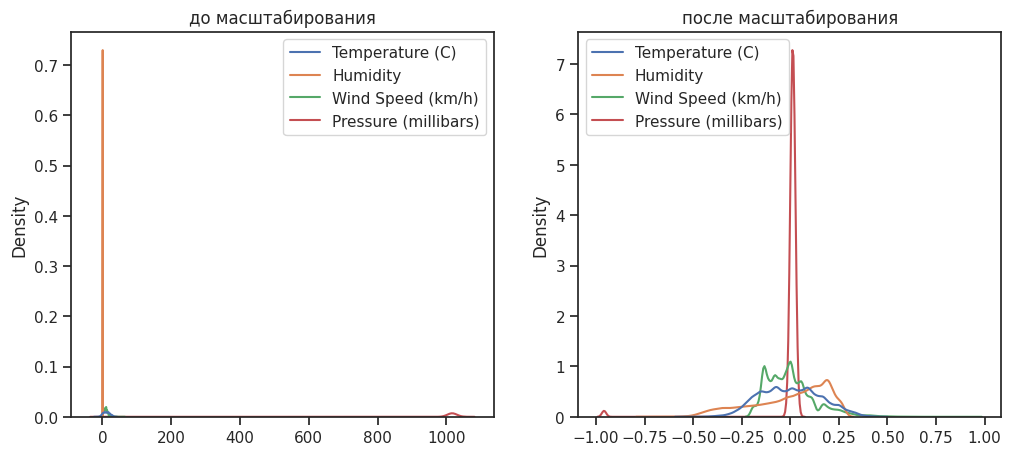

In [22]:
draw_kde(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

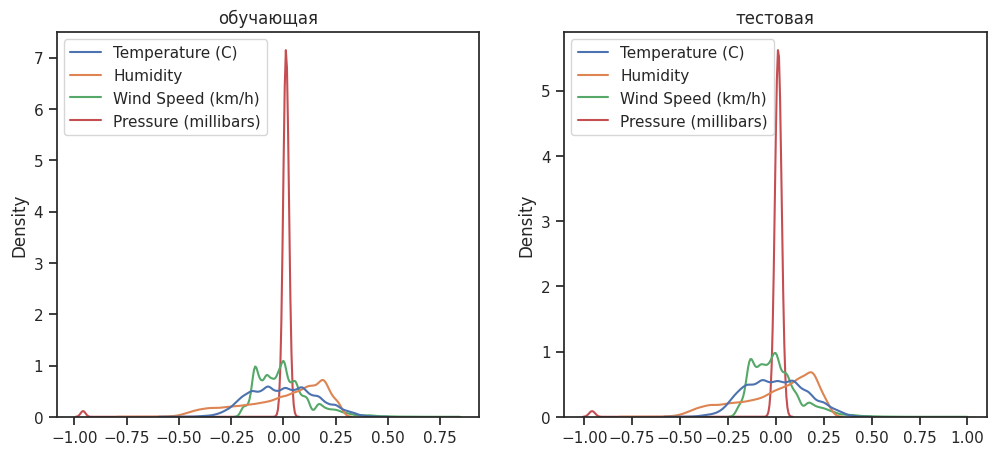

In [23]:
draw_kde(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

###MinMax

In [25]:
# Обучаем MinMaxScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.546835,0.575172,0.734899,0.169306,0.522310,0.642691,0.958768
std,0.154737,0.159509,0.195473,0.108274,0.299118,0.260380,0.111785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.429484,0.447767,0.600000,0.091276,0.323120,0.518000,0.967048
50%,0.547925,0.592246,0.780000,0.156077,0.501393,0.624000,0.971397
75%,0.658717,0.694226,0.890000,0.221382,0.807799,0.920000,0.975831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


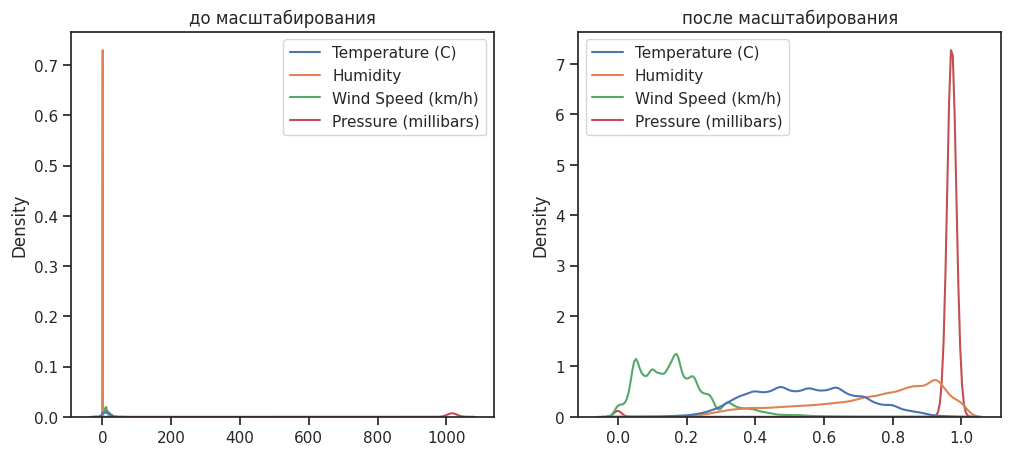

In [26]:
draw_kde(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

###MaxAbs


In [27]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,0.299023,0.275897,0.734899,0.169306,0.522310,0.642691,0.958768
std,0.239354,0.271877,0.195473,0.108274,0.299118,0.260380,0.111785
min,-0.546847,-0.704462,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.117500,0.058740,0.600000,0.091276,0.323120,0.518000,0.967048
50%,0.300710,0.304999,0.780000,0.156077,0.501393,0.624000,0.971397
75%,0.472087,0.478820,0.890000,0.221382,0.807799,0.920000,0.975831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


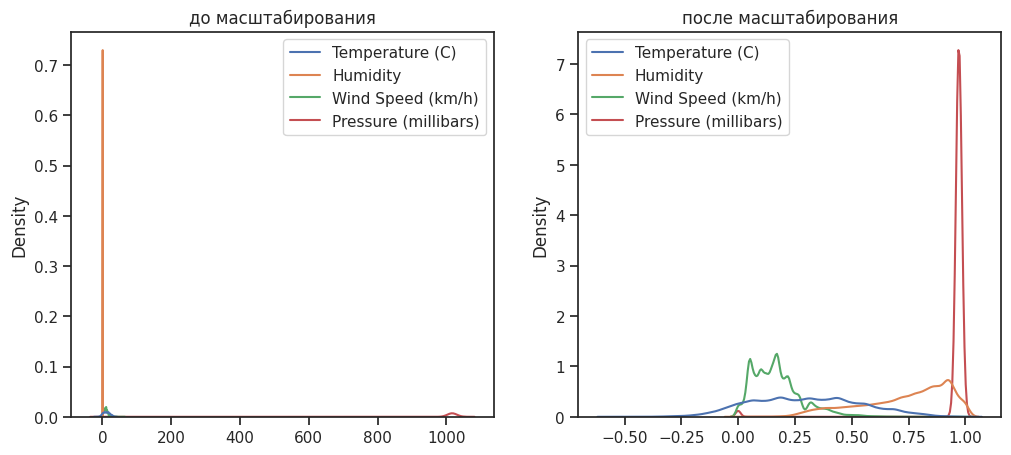

In [28]:
draw_kde(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

##Обработка выбросов


In [31]:
def diagnostic_plots(df, variable, title):
  fig, ax = plt.subplots(figsize=(10,7)) # гистограмма
  plt.subplot(2, 2, 1)
  df[variable].hist(bins=30)
  ## Q-Q plot
  plt.subplot(2, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt) # ящик с усами
  plt.subplot(2, 2, 3)
  sns.violinplot(x=df[variable])
  # ящик с усами
  plt.subplot(2, 2, 4)
  sns.boxplot(x=df[variable])
  fig.suptitle(title)
  plt.show()

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


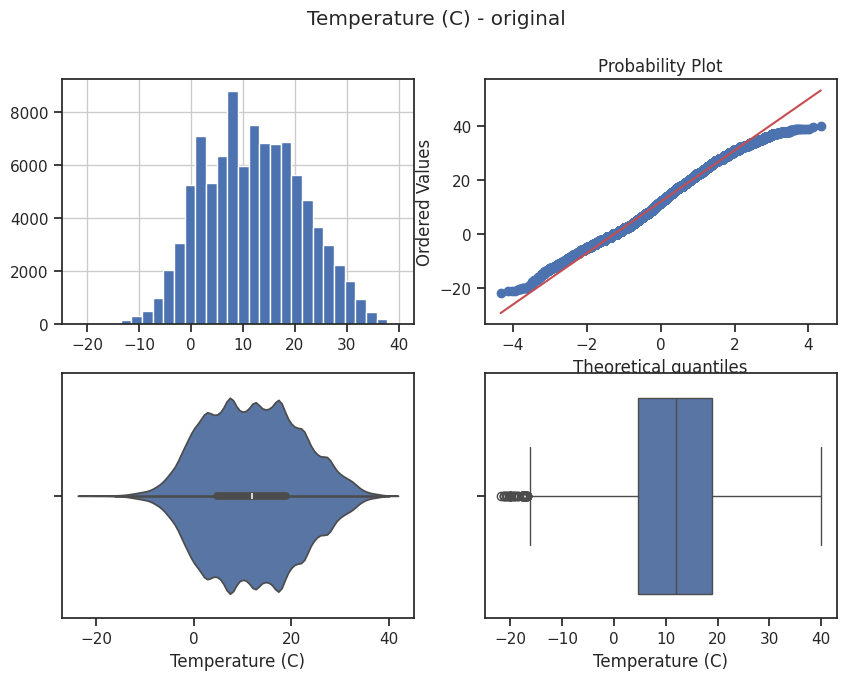

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


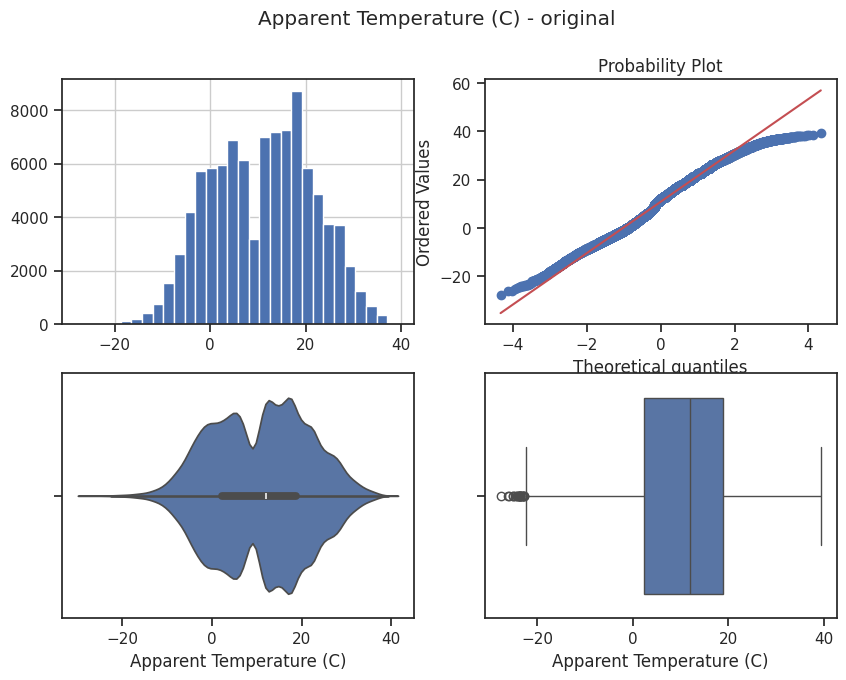

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


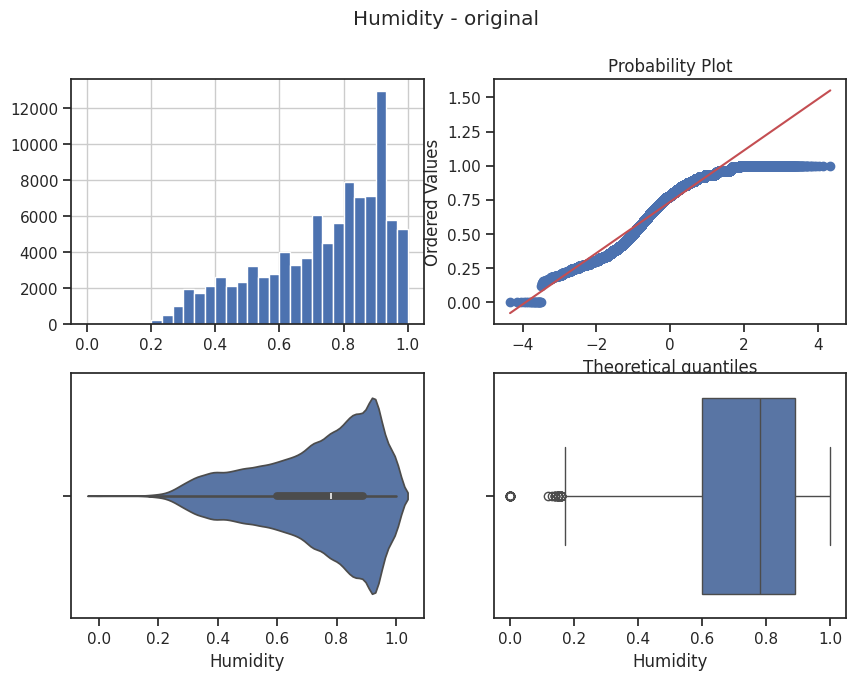

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


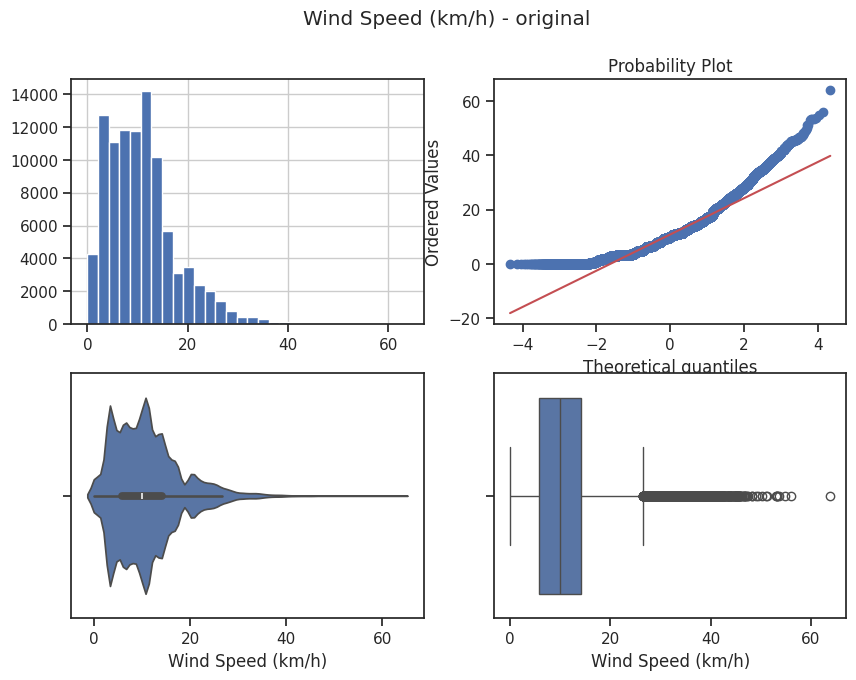

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


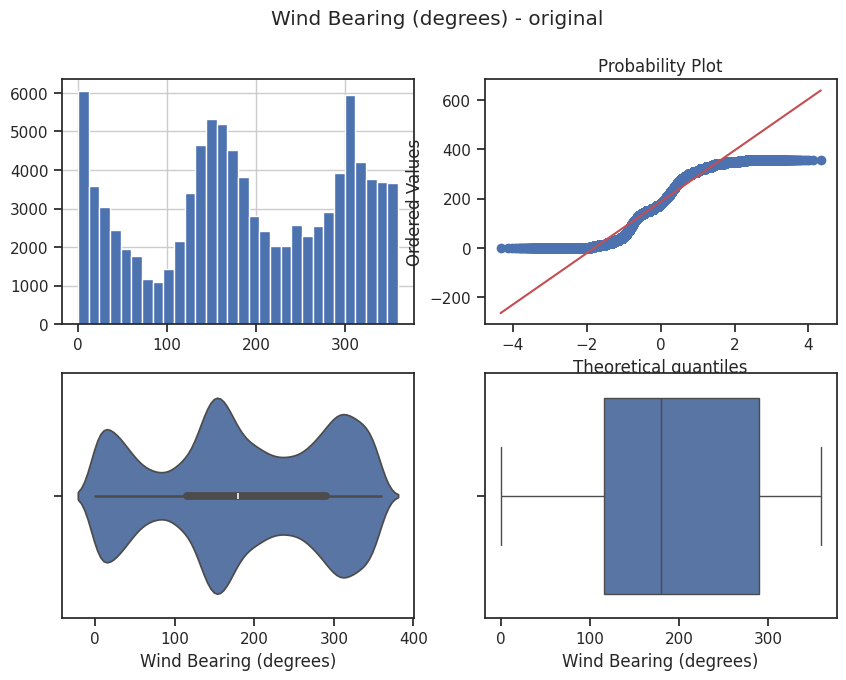

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


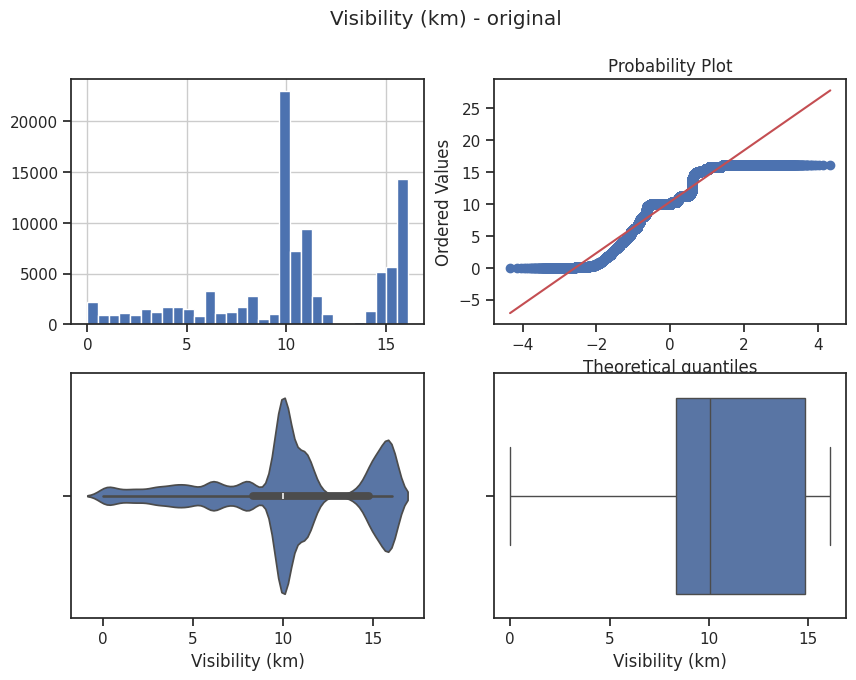

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


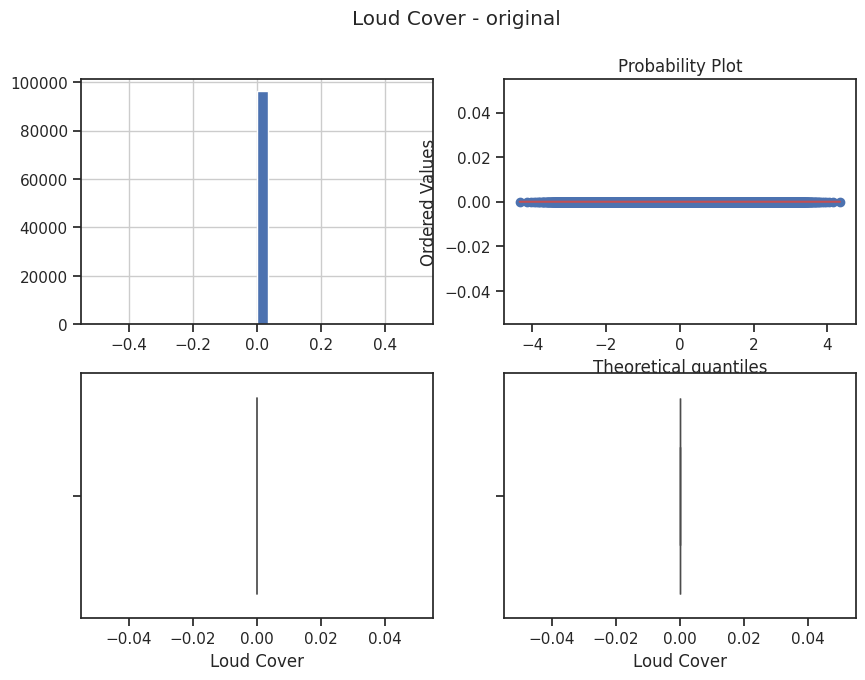

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


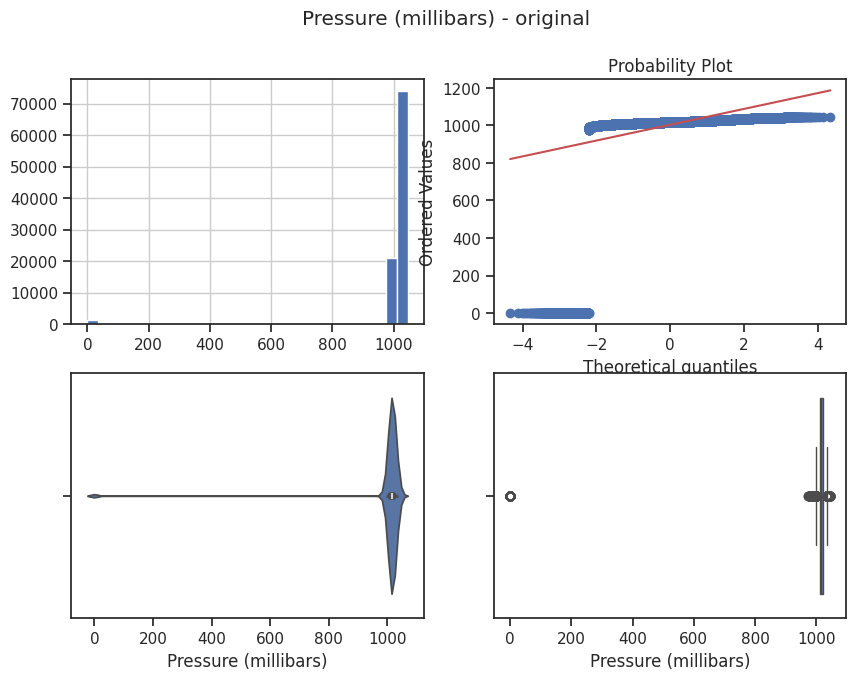

In [34]:
for col in data:
  if data.dtypes[col]=='float64':
    diagnostic_plots(data, col, col+' - original')

В pressure явно выражены квантили - вероятно, произошли ошибки при получении данных с приборов. Удалим их.

<ipython-input-31-5c890d09f1c5>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


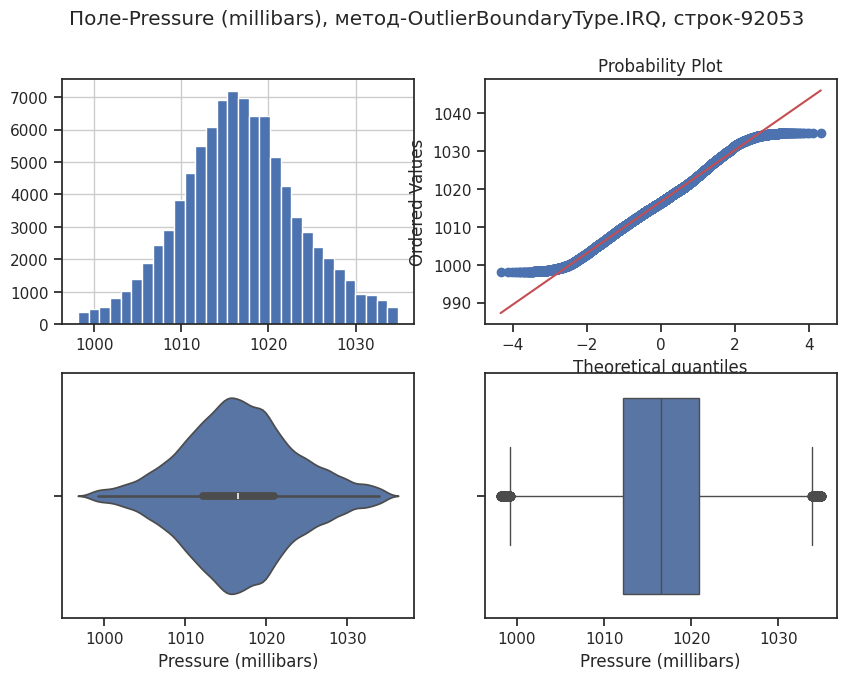

In [35]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
  SIGMA = 1
  QUANTILE = 2
  IRQ = 3
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
  if outlier_boundary_type == OutlierBoundaryType.SIGMA:
    K1 = 3
    lower_boundary = df[col].mean() - (K1 * df[col].std())
    upper_boundary = df[col].mean() + (K1 * df[col].std())
  elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
  elif outlier_boundary_type == OutlierBoundaryType.IRQ:
    K2 = 1.5
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
    upper_boundary = df[col].quantile(0.75) + (K2 * IQR)
  else:
    raise NameError('Unknown Outlier Boundary Type')
  return lower_boundary, upper_boundary

col = 'Pressure (millibars)'

if data.dtypes[col]=='float64':
  for obt in OutlierBoundaryType:
    # Вычисление верхней и нижней границы
    lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
    # Флаги для удаления выбросов
    outliers_temp = np.where(data[col] > upper_boundary, True, np.where(data[col] < lower_boundary, True, False))

# Удаление данных на основе флага
  data_trimmed = data.loc[~(outliers_temp), ]
  title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt,
  data_trimmed.shape[0])
  diagnostic_plots(data_trimmed, col, title)

##Обработка признака - извлечение месяца

In [36]:
data_copy = data.copy()
data_copy['f'] = pd.to_datetime(data_copy['Formatted Date'])
data['month'] = data_copy['f'].apply(lambda x: x.month)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4


##Отбор признаков

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Precip Type'])
data['enc_prec_type']=le.transform(data['Precip Type'])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,month,enc_prec_type
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4,0


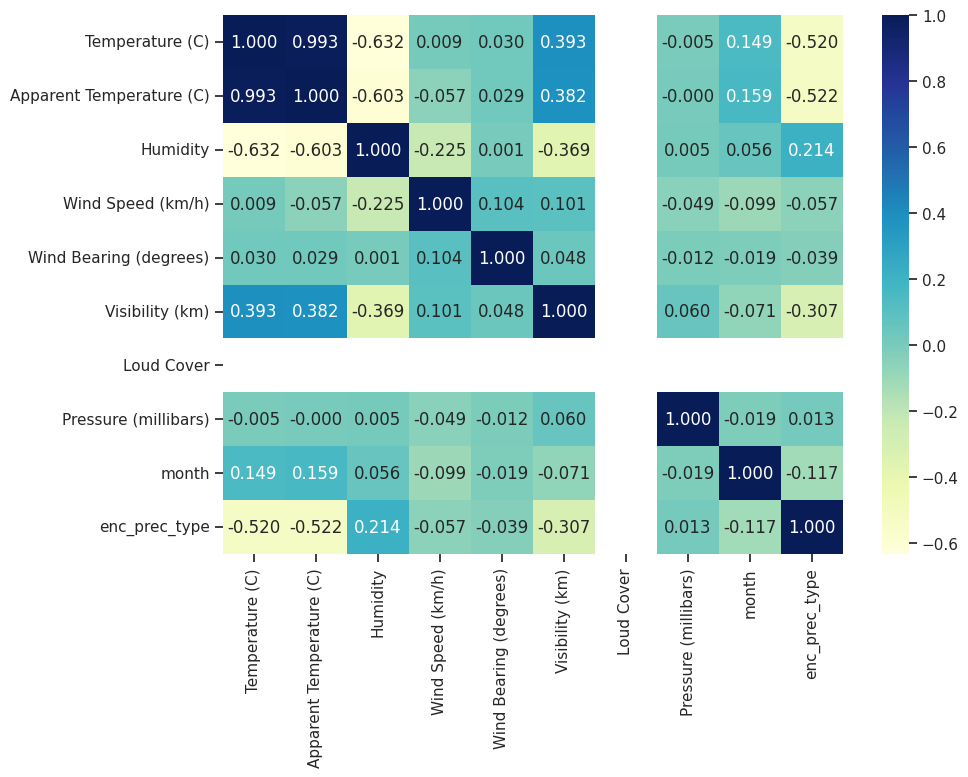

In [38]:
data_numeric = data.drop(columns=['Formatted Date','Summary','Precip Type', 'Daily Summary'])
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data_numeric.corr(), cmap='YlGnBu', annot=True, fmt='.3f')
plt.show()

Возьмем Apparent temperature за целевой признак. Необходимо определить, как себя чувствует человек при некой температуре.

In [39]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack()
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.5]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr
make_corr_df(data_numeric)

,f1,f2,corr
0,Apparent Temperature (C),Temperature (C),0.992629
1,Temperature (C),Apparent Temperature (C),0.992629
2,Humidity,Temperature (C),0.632255
3,Temperature (C),Humidity,0.632255
4,Apparent Temperature (C),Humidity,0.602571
5,Humidity,Apparent Temperature (C),0.602571
6,enc_prec_type,Apparent Temperature (C),0.521781
7,Apparent Temperature (C),enc_prec_type,0.521781
8,enc_prec_type,Temperature (C),0.520381
9,Temperature (C),enc_prec_type,0.520381


In [42]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
  grouped_feature_list = []
  correlated_groups = []
  for feature in cr['f1'].unique():
    if feature not in grouped_feature_list:
      # находим коррелирующие признаки
      correlated_block = cr[cr['f1'] == feature]
      cur_dups = list(correlated_block['f2'].unique()) + [feature]
      grouped_feature_list = grouped_feature_list + cur_dups
      correlated_groups.append(cur_dups)
    return correlated_groups
corr_groups(make_corr_df(data_numeric))

[['Temperature (C)', 'Humidity', 'enc_prec_type', 'Apparent Temperature (C)']]

###Wrapper

In [45]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
data_X = data_numeric.drop(columns=['Apparent Temperature (C)'])
data_Y = data_numeric['Apparent Temperature (C)']
knn = KNeighborsRegressor(n_neighbors=3)
efs1 = EFS(knn,
           min_features=2,
           max_features=4,
           scoring='r2',
           print_progress=True,
           cv=5)
efs1 = efs1.fit(data_X, data_Y)
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 246/246

Best accuracy score: 1.00
Best subset (indices): (0, 1, 2)
Best subset (corresponding names): ('Temperature (C)', 'Humidity', 'Wind Speed (km/h)')


###Методы вложений (embedded methods)

In [46]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(data_X, data_Y)
# Коэффициенты регрессии
list(zip(list(data_X.columns.values), e_ls1.coef_))

[('Temperature (C)', 1.1010877533122716),
 ('Humidity', 0.0),
 ('Wind Speed (km/h)', -0.08087790939102854),
 ('Wind Bearing (degrees)', 0.0004107880410152474),
 ('Visibility (km)', 0.0),
 ('Loud Cover', 0.0),
 ('Pressure (millibars)', 0.00016554852457849808),
 ('month', 0.0),
 ('enc_prec_type', -0.0)]

In [47]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(data_X, data_Y)
list(zip(list(data_X.columns.values), sel_e_ls1.get_support()))

[('Temperature (C)', True),
 ('Humidity', False),
 ('Wind Speed (km/h)', True),
 ('Wind Bearing (degrees)', True),
 ('Visibility (km)', False),
 ('Loud Cover', False),
 ('Pressure (millibars)', True),
 ('month', False),
 ('enc_prec_type', False)]